Rate your preferences on a scale from 1 to 5.

Recommended Groceries Based on Your Preferences:
Tofu


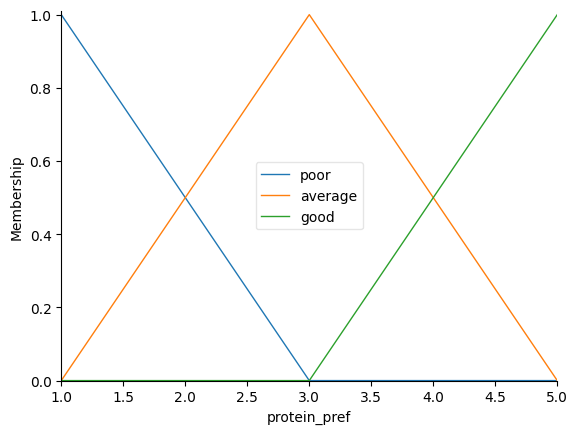

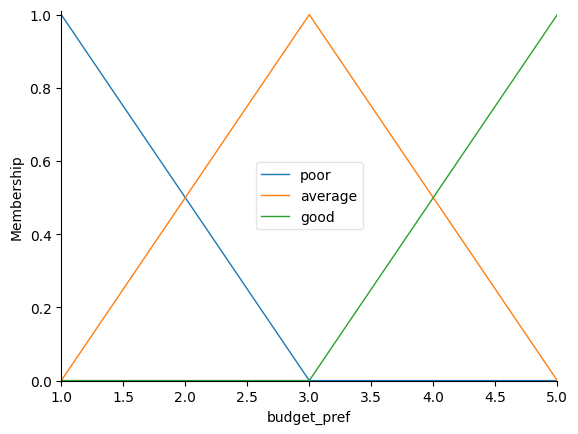

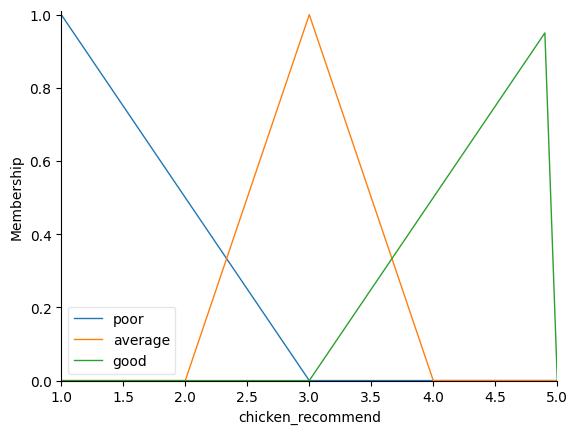

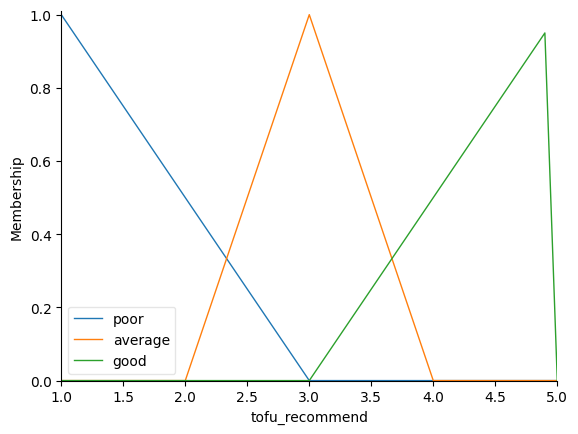

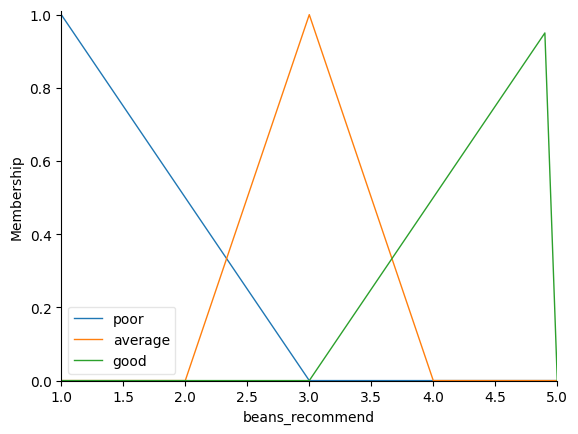

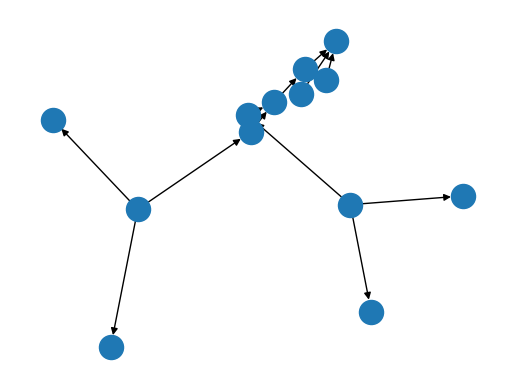

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

protein_pref = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'protein_pref')
budget_pref = ctrl.Antecedent(np.arange(1, 5.1, 0.1), 'budget_pref')
chicken_recommend = ctrl.Consequent(np.arange(1, 5.1, 0.1), 'chicken_recommend')
tofu_recommend = ctrl.Consequent(np.arange(1, 5.1, 0.1), 'tofu_recommend')
beans_recommend = ctrl.Consequent(np.arange(1, 5.1, 0.1), 'beans_recommend')

protein_pref.automf(3)
budget_pref.automf(3)

chicken_recommend['poor'] = fuzz.trimf(chicken_recommend.universe, [1, 1, 3])
chicken_recommend['average'] = fuzz.trimf(chicken_recommend.universe, [2, 3, 4])
chicken_recommend['good'] = fuzz.trimf(chicken_recommend.universe, [3, 5, 5])

tofu_recommend['poor'] = fuzz.trimf(tofu_recommend.universe, [1, 1, 3])
tofu_recommend['average'] = fuzz.trimf(tofu_recommend.universe, [2, 3, 4])
tofu_recommend['good'] = fuzz.trimf(tofu_recommend.universe, [3, 5, 5])

beans_recommend['poor'] = fuzz.trimf(beans_recommend.universe, [1, 1, 3])
beans_recommend['average'] = fuzz.trimf(beans_recommend.universe, [2, 3, 4])
beans_recommend['good'] = fuzz.trimf(beans_recommend.universe, [3, 5, 5])

protein_pref.view()
budget_pref.view()

chicken_recommend.view()
tofu_recommend.view()
beans_recommend.view()

rule1 = ctrl.Rule(protein_pref['good'] | budget_pref['good'], chicken_recommend['good'])
rule2 = ctrl.Rule(protein_pref['good'] | budget_pref['poor'], beans_recommend['good'])
rule3 = ctrl.Rule(protein_pref['good'] | budget_pref['average'], tofu_recommend['good'])
rule4 = ctrl.Rule(protein_pref['good'] | budget_pref['good'], beans_recommend['poor'])
rule5 = ctrl.Rule(protein_pref['good'] | budget_pref['poor'], chicken_recommend['poor'])
rule6 = ctrl.Rule(protein_pref['good'] | budget_pref['average'], tofu_recommend['average'])
rule7 = ctrl.Rule(protein_pref['good'] | budget_pref['good'], tofu_recommend['average'])
rule8 = ctrl.Rule(protein_pref['good'] | budget_pref['poor'], tofu_recommend['average'])
rule9 = ctrl.Rule(protein_pref['good'] | budget_pref['average'], chicken_recommend['average'])

grocery_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

rule1.view()

grocery_sim = ctrl.ControlSystemSimulation(grocery_ctrl)

print("Rate your preferences on a scale from 1 to 5.")
protein_input = int(input("Protein importance (1: Not important, 5: Very important): "))
budget_input = int(input("Budget preference (1: poor budget, 5: good budget): "))

grocery_sim.input['protein_pref'] = protein_input
grocery_sim.input['budget_pref'] = budget_input

grocery_sim.compute()

chicken_suggestion = grocery_sim.output['chicken_recommend']
tofu_suggestion = grocery_sim.output['tofu_recommend']
beans_suggestion = grocery_sim.output['beans_recommend']

suggestions = [
    ('Chicken', chicken_suggestion),
    ('Tofu', tofu_suggestion),
    ('Beans', beans_suggestion)
]

threshold = 3

print("\nRecommended Groceries Based on Your Preferences:")
for item, suggestion in suggestions:
    if suggestion > threshold:
        print(f"{item}")